## Trasformaciones de intensidad y filtrado espacial

Cuando nos referimos al filtrado espacial estamos hablando del plano(Cartesiano casi siempre) en el que se enmarcan las imagenes,  los metodos que se encuentran en esta categoria estan basados en la manipulación directa de los pixels en la imagen. Las dos categorias más importantes de estos filtrados son:
     +  Transformaciones de Intensidad(Escala de grises)
     +  Filtado espacial
     
Dentro de la primera categoria estan las transformaciones que realizan un resaltado o mejora de la iluminación de las imagenes(las mas básicas dentro de el procesamiento de imagenes)

El filtrado espacial puede ser expresado:
    $$g(x,y)=T[f(x,y)]$$

Donde $f(x,y)$ es la imagen de entrada, $g(x,y)$ es la imagen de salida(procesada) y $T$ es un operador sobre $f$, definido sobre un entorno del pixel $(x,y)$. Ademas $T$ puede operar sobre un set de imagenes como por ejemplo la suma de $n$ imagenes para cancelar el ruido.

# 1-  Mostrar mediante ejempos los efectos que se producen en el histograma de una imagen al modificarle su brillo y su contraste 

Se puede obtener una estimación del brillo de una imagen a traves de la media de su hidstogram, y una estimación del contraste con la varianza de su histograma. 

$$E\left\{his \right\} \sim brightness$$

$$\sigma^{2}_{hist} \sim contrast$$

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inline outputs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def imadjust(image, low_in, hig_in, low_out, hig_out, gamma):
    """
    Compute the pixels transformation(Matlab function)
    
    inputs:
    ------
    image: grayscale image
    
    output:
    ------
    modified image
    
    """
    image_mod = np.zeros(image.shape, dtype=np.uint8)

    image_mod = low_out + (hig_out - low_out) * ((image - low_in) / (hig_in - low_in)) ** gamma


    return image_mod

In [4]:
def histograma(image):
    """
    Compute the histogram of a uint8 image(grayscale)
    
    inputs
    -------
    image: a grayscale image
    
    output
    ------
    h: numpy array with the probabilities of each pixel
    """
    h = np.zeros(256, dtype=float)
    image = image.astype(np.uint8)
    for i in xrange(256):
        x = np.array([])
        x = np.argwhere(image == i)
        if (len(x) == 0):
            continue
        h[i] = len(x) / float(image.size)  # Normalizamos
    return h

In [5]:
path1 = '../Imagenes/galaxy_gray.jpeg'
path2 = '../Imagenes/baboon.jpg'

In [6]:
img1 = cv2.imread(path1, 0) 
J = imadjust(img1, .5, .75, .3, 1, .37)

hist1 = histograma(img1)
hist2 = histograma(J)

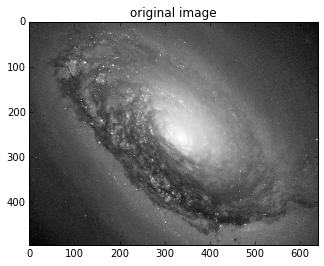

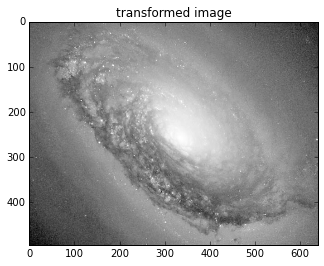

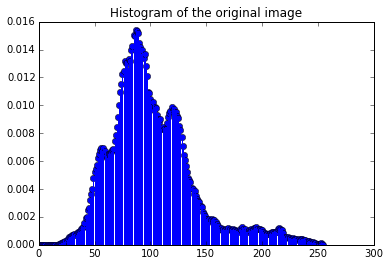

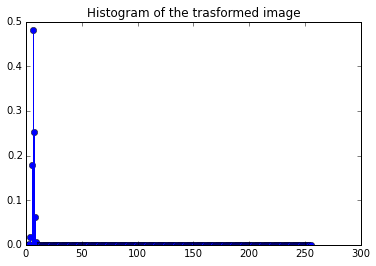

In [7]:
plt.figure()
plt.title('original image')
plt.imshow(img1, cmap='gray')
plt.figure()
plt.title('transformed image')
plt.imshow(J, cmap='gray')
plt.figure()
plt.title('Histogram of the original image')
plt.stem(np.arange(256), hist1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.figure()
plt.title('Histogram of the trasformed image')
plt.stem(np.arange(256), hist2, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

In [8]:
# compare the brightness
print "la media del histograma de la imagen1:", np.mean(hist1)
print "la media del histograma de la transformada:", np.mean(hist2)
# compare the contrast
print "la varianza del histograma de la imagen1:", np.var(hist1)
print "la varianza del histograma de la transformada:", np.var(hist2)

la media del histograma de la imagen1: 0.00390625
la media del histograma de la transformada: 0.00390625
la varianza del histograma de la imagen1: 1.98458868999e-05
la varianza del histograma de la transformada: 0.00127802410385


#2- Modificar el brillo y el contraste a las Imagenes tomadas en TP1 de manera que se puedan apreciar la mayor cantidad de detalles(tener en cuenta el histograma)

In [9]:
def contrast_stretch(image, m, E):
    """
    compute the contrast stretch transformation(Gonzalez-Goods: pag:69)
    
    inputs:
    ------
    image: a grayscale image
    m: cut-off grayscale limit
    E: nonlinear parameter(control the slope of the function)
    
    output:
    ------
    g: transformed image
    """
    epsilon = np.finfo(np.float).eps
    
    g = 1 / (1 + (m / (image + epsilon)) ** E)
    
    return g

In [10]:
path1 = '../Imagenes/sci-2.bmp'

path2 = '../Imagenes/baboon.jpg'
img1 = cv2.imread(path2, 0)

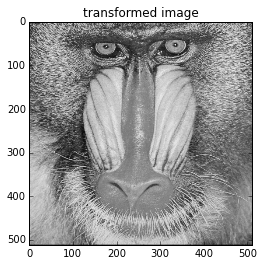

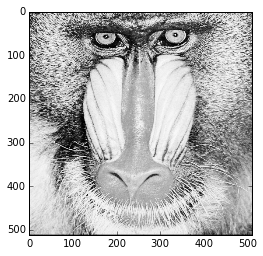

In [11]:
g1 = contrast_stretch(img1, 100,3)

plt.figure()
plt.title('original image')
plt.imshow(img1, cmap='gray')
plt.title('transformed image')
plt.figure()
plt.imshow(g1, cmap='gray')
plt.show()

#3- Mostrar mediante ejemplos los efectos que se producen en el histograma de una Imagen al aplicarle una ecualizacion por histograma() Implementacion de Opencv

In [12]:
path1 = '../Imagenes/300px-Unequalized_Hawkes_Bay_NZ.jpg'
img_gray = cv2.imread(path1, 0) 
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])

###Con Numpy:
#### Utilizando Masked array
http://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html

Primero tenemos que hallar la funcion de distribucion acumulativa de las probabilidades de los pixels(el histograma normalizado)

In [13]:
cdf = np.cumsum(hist)

In [14]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [15]:
img_transform = cdf[img_gray]
hist_transform,bins = np.histogram(img_transform.flatten(),256,[0,256])

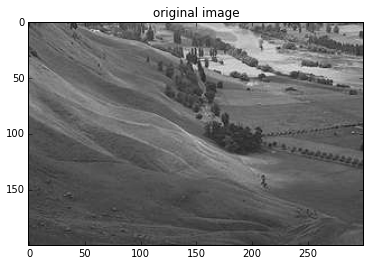

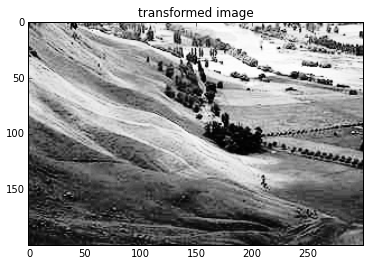

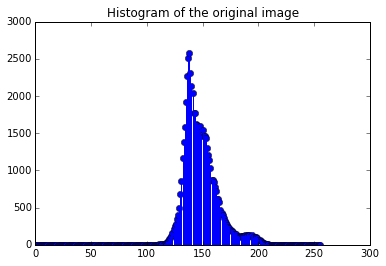

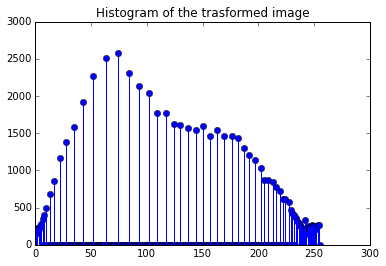

In [16]:

plt.figure()
plt.title('original image')
plt.imshow(img_gray, cmap='gray')
plt.figure()
plt.title('transformed image')
plt.imshow(img_transform, cmap='gray')
plt.figure()
plt.title('Histogram of the original image')
plt.stem(np.arange(256), hist, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.figure()
plt.title('Histogram of the trasformed image')
plt.stem(np.arange(256), hist_transform, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

In [17]:
img1 = cv2.imread(path2, 0)

eq = cv2.equalizeHist(img1)

res = np.hstack((img1,eq))


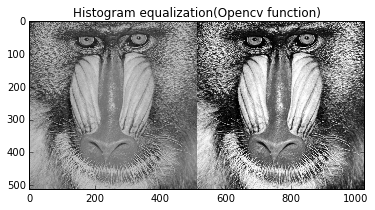

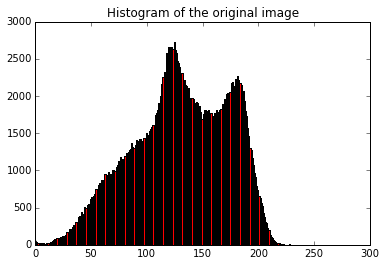

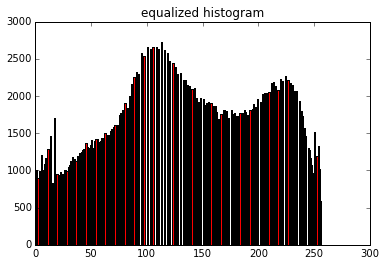

In [18]:
cv2.imwrite('res.png', res)

img_res = cv2.imread('res.png', 0)
plt.figure()
plt.imshow(img_res, cmap='gray')
plt.title('Histogram equalization(Opencv function)')
plt.figure()
plt.hist(img1.flatten(), 256, [0,256], color='r')
plt.title('Histogram of the original image')
plt.figure()
plt.hist(eq.flatten(), 256, [0,256], color='r')
plt.title('equalized histogram')
plt.show()

#4- Desarrollar una funcion que permita realizar el efecto de falso color en una imagen dada 

Nos dan los siguientes perfiles que deben tener los canales. A continuación la imagen:

In [48]:
imagen_perfiles = cv2.imread('../Imagenes/Ejemplo RGB.bmp')

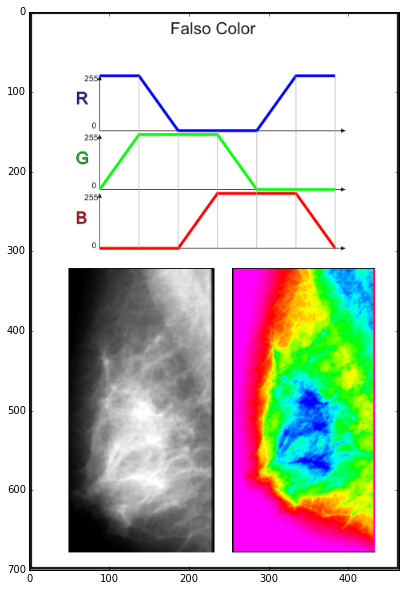

In [50]:
plt.imshow(imagen_perfiles,figsize(10,10))

La mejor manera de realizar esto es con lo que se conoce como una *look-up-table* (LUT). En Opencv existe una función que realiza este trabajo y que esta implementada en Python. Vamos a mantener la vieja e ineficiente implementación para luego comparar los tiempos de procesamiento.

Primero formamos los perfiles de cada canal como el que nos dieron. Haciendo uso de las caracteristicas del lenguage(*fancy indexing, slicing, element-wise operations...*) y evitando el uso de bucles

In [19]:
red = np.zeros(256,dtype="uint8")
red[0:43] =  255
red[43:86] = np.arange(43,0,-1) * (255.0 / 43.0)
red[172:215] = np.arange(0,43) * (255.0 / 43.0)
red[214:] = 255

In [20]:
green = np.zeros(256,dtype="uint8")
green[0:43] = np.arange(43) * (255.0 / 43.0)
green[43:129] = 255
green[129:172] = np.arange(43,0,-1) * (255.0 / 43.0)

In [21]:
blue = np.zeros(256,dtype="uint8")
blue[86:129] = np.arange(43) * (255.0 / 43.0)
blue[129:213] = 255
blue[213:] = np.arange(43,0,-1) * (255 / 43.0)

Los dibujamos para ver que estan bien

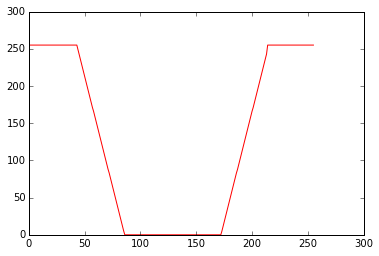

In [22]:
plt.plot(red,'r')

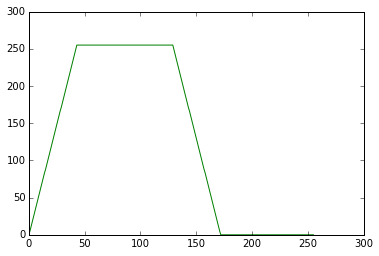

In [23]:
plt.plot(green,'g')

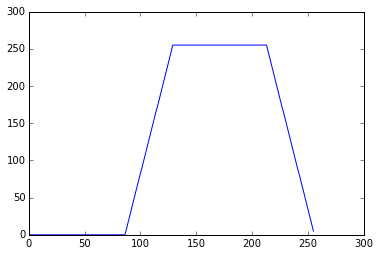

In [24]:
plt.plot(blue)

In [25]:
path2 = '../Imagenes/ALyapunov-mathematician.jpg'

img2 = cv2.imread(path2, 0)

utilizamos las funciones de Opencv:

```python
cv2.LUT()
cv2.merge()
```
Para hacer una nueva función que toma una imagen y devuelve otra imagen con los perfile que nos dieron

Las comparaciones de tiempos son sorprendentes 4(ms) - 4(s) ¡¡¡

In [26]:
def false_color(img):
    """
    Function for calculate a false color of a image
    
    Input:
    -----
    img: grayscale image
    
    output:
    ------
    img_fc: 3-channel false color image
    
    """
    # red LUT
    red = np.zeros(256,dtype="uint8")
    red[0:43] =  255
    red[43:86] = np.arange(43,0,-1) * (255.0 / 43.0)
    red[172:215] = np.arange(0,43) * (255.0 / 43.0)
    red[214:] = 255
    # green LUT
    green = np.zeros(256,dtype="uint8")
    green[0:43] = np.arange(43) * (255.0 / 43.0)
    green[43:129] = 255
    green[129:172] = np.arange(43,0,-1) * (255.0 / 43.0)
    # blue LUT
    blue = np.zeros(256,dtype="uint8")
    blue[86:129] = np.arange(43) * (255.0 / 43.0)
    blue[129:213] = 255
    blue[213:] = np.arange(43,0,-1) * (255 / 43.0)
    
    m,n = img.shape
    img_fc = np.zeros((m,n,3))
    
    img_fc_r = cv2.LUT(img,red)
    img_fc_g = cv2.LUT(img,green)
    img_fc_b = cv2.LUT(img,blue)
    img_fc = cv2.merge((img_fc_r,img_fc_g,img_fc_b))
    return img_fc

In [46]:
%time img_fc = false_color(img2)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.71 ms


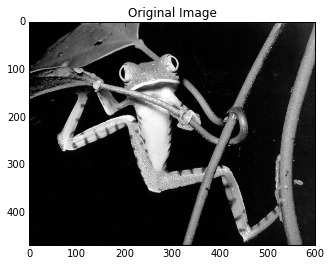

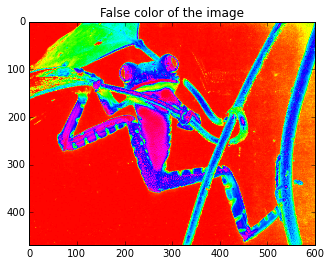

In [47]:
# Plots
plt.figure()
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.figure()
plt.imshow(img_fc)
plt.title('False color of the image')


In [29]:
#MAAAALA implentacion TODO :
def falso_color(img):
    """docstring for falso_color"""
    
    rows,cols = img.shape
    img_red = np.copy(img)
    img_green = np.copy(img)
    img_blue = np.copy(img)
    img_false = np.zeros((rows, cols, 3), dtype=np.uint8)
    
    for i in xrange(0,rows):
        for j in xrange(0,cols):
        
            if (0<=img[i,j]<=43):
                img_red[i,j] = 255
                img_green[i,j] = img[i,j]*(255/43)
                img_blue[i,j] = 0
            
            elif(43<img[i,j]<=86):
                img_red[i,j] = (255-(img[i,j]-43)*(255/43))
                img_green[i,j]=255
                img_blue[i,j]=0
        
            elif(86<img[i,j]<=128):
                img_red[i,j] = 0
                img_green[i,j] = 255
                img_blue[i,j] = ((img[i,j]-86)*(255/42))
        
            elif(128<img[i,j]<=171):
                img_red[i,j] = 0
                img_green[i,j] = ((171-img[i,j])*(255/43))
                img_blue[i,j] = 255
        
            elif(171<img[i,j]<=214):
                img_red[i,j] = (img[i,j]-171)*(255/43)
                img_green[i,j] = 0
                img_blue[i,j] = 255
        
            elif(214<img[i,j]):
                img_red[i,j] = 255
                img_green[i,j] = 0
                img_blue[i,j] = ((255-img[i,j])*(255/41))
    
    img_false[:,:,0]=img_red
    img_false[:,:,1]=img_green
    img_false[:,:,2]=img_blue

    return img_false

In [30]:
path2 = '../Imagenes/ALyapunov-mathematician.jpg'

image = cv2.imread(path2, 0)

In [31]:
%time falso = falso_color(image)

CPU times: user 3.34 s, sys: 4 ms, total: 3.34 s
Wall time: 4.42 s


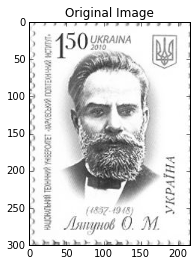

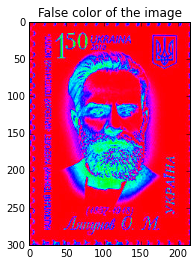

In [32]:
#cv2.imwrite( 'opensource.png', falso)
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.figure()
plt.imshow(falso)
plt.title('False color of the image')

#5- Para dos Imágenes distintintas (en escala de grises) acentuar los bordes utilizando los filtros “Laplacian Sharpening” y “Hight Boost Filter”

In [33]:
path1 = '../Imagenes/baboon.jpg'
path2 = '../Imagenes/Rana2.bmp'

In [34]:
img1 = cv2.imread(path1, 0)
img2 = cv2.imread(path2, 0)

In [35]:
#Utilizamos las herramientas de Opencv
laplaciano = cv2.Laplacian(img1, -1)
#Una alternativa es usar filter2d ingresando el kernel correspondiente
ker_laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplaciano2 = cv2.filter2D(img1, -1, ker_laplacian)

In [36]:
#Notar que utilizamos una funcion lambda
ker_hb = lambda A: np.array([[0,-1,0],[-1,A+4,-1],[0,-1,0]])
img2_hb = cv2.filter2D(img2, -1, ker_hb(1))

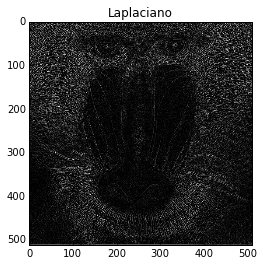

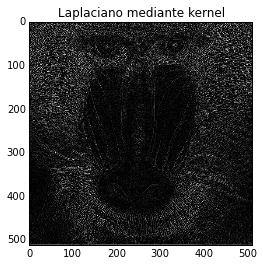

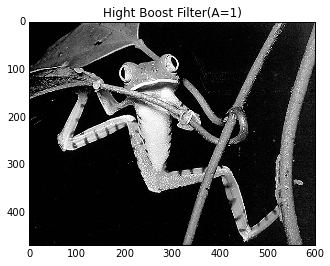

In [37]:
plt.figure()
plt.imshow(laplaciano, cmap='gray')
plt.title('Laplaciano')
plt.figure()
plt.imshow(laplaciano2, cmap='gray')
plt.title('Laplaciano mediante kernel')
plt.figure()
plt.imshow(img2_hb, cmap='gray')
plt.title('Hight Boost Filter(A=1)')

#6- Mostrar un ejemplo de la aplicación de la “magnitud del gradiente” para resaltar bordes.

In [38]:
path1 = '../Imagenes/opensource-softwares2.jpg'
path2 = '../Imagenes/Rana2.bmp'

img1 = cv2.imread(path1, 0)
img2 = cv2.imread(path2, 0)

kernel_grad = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img2_grad = cv2.filter2D(img1, -1, kernel_grad)


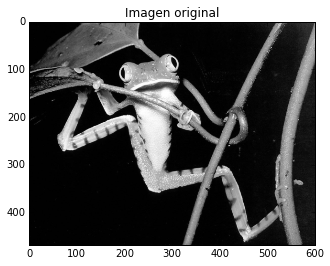

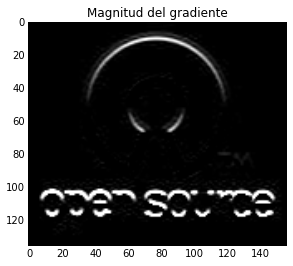

In [39]:
plt.figure()
plt.imshow(img2, cmap='gray')
plt.title('Imagen original')
plt.figure()
plt.imshow(img2_grad, cmap='gray')
plt.title('Magnitud del gradiente')

#7- Aplicar el filtro promediador a 2 imágenes (en escalas de grises) distintas.

In [40]:
def ker_prom(n):
    ker = np.ones((n,n))
    ker_promedio = ker/np.size(ker)
    return ker_promedio

In [41]:
path1 = '../Imagenes/baboon.jpg'
path2 = '../Imagenes/Rana2.bmp'

In [42]:
img1 = cv2.imread(path1, 0)
img2 = cv2.imread(path2, 0)

In [43]:
prom1= cv2.filter2D(img1, -1, ker_prom(10))

prom2= cv2.filter2D(img2, -1, ker_prom(10))

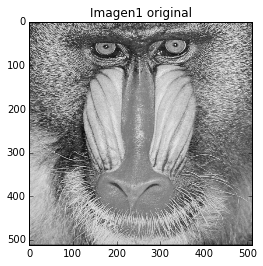

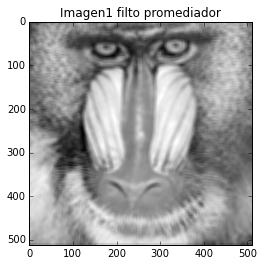

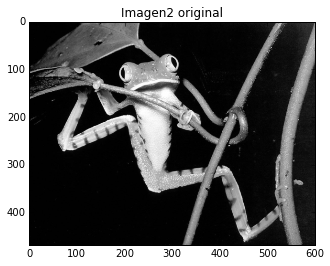

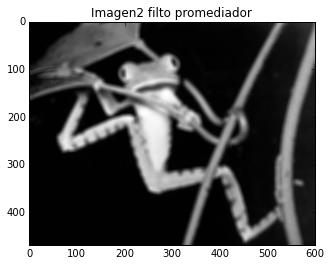

In [44]:
plt.figure()
plt.imshow(img1, cmap='gray')
plt.title('Imagen1 original')
plt.figure()
plt.imshow(prom1, cmap='gray')
plt.title('Imagen1 filto promediador')
plt.figure()
plt.imshow(img2, cmap='gray')
plt.title('Imagen2 original')
plt.figure()
plt.imshow(prom2, cmap='gray')
plt.title('Imagen2 filto promediador')